In [177]:
import pandas as pd
import numpy as np
import datetime as dt

## Data Analysis with Pandas 

In [3]:
df = pd.read_csv('Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv')

In [12]:
df.head(1)

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,...,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,1 State Street,David Neiburg,eskoblo@energyspec.com,7186779077,1114 Avenue J,Brooklyn,NY,11230,Commercial,35 story building,...,349.78,Brooklyn,40.624784,-73.96492,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood


## Questions
- How many different companies are represented in the data set?
- What is the total number of jobs created for businesses in Queens?
- How many different unique email domains names are there in the data set?
- Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?
- Save your result for the previous question as a CSV file.

### Number of different companies:

In [59]:
df['Company Name'].nunique()

439

### Total number of jobs created for businesses in Queens

In [20]:
int(df[df['Borough'] == 'Queens']['Job created'].sum())

102

### Unique email domains names

In [69]:
filtered_df = df.dropna(subset=['company email']).reset_index() # After removing 'NaN' from emails

<font color ='blue'> Domain names from the email ids </font>

In [70]:
domain_list_1 =[filtered_df.loc[i,'company email'].split('@')[1] for i in range(len(filtered_df)) if len(filtered_df.loc[i,'company email'].split('@')) == 2 ]

<font color ='blue'> Domain names where the email ids are not provided, rather a website is provided.</font>

In [71]:
domain_list_2 =[filtered_df.loc[i,'company email'] for i in range(len(filtered_df)) if len(filtered_df.loc[i,'company email'].split('@')) == 1 ]

In [72]:
pd.Series(domain_list_1+ domain_list_2).nunique()

361

<font color ='blue'> Therefore, the unique domain names are 361.  </font>

### NTAs with at least 5 listed businesses, and their average total savings and the total jobs created.

In [121]:
NTA_data = df.groupby('NTA').agg({'Company Name':'nunique', 
                       'Total Savings': 'mean',
                        'Job created':'sum'}).reset_index()

In [122]:
savings_jobs_data = NTA_data[NTA_data['Company Name'] >= 5] 

In [126]:
savings_jobs_data.reset_index(drop=True, inplace=True)

In [127]:
savings_jobs_data

,NTA,Company Name,Total Savings,Job created
0,Battery Park City-Lower Manhattan,9,469890.796667,0.0
1,Bushwick South,10,26140.455000,10.0
2,Carroll Gardens-Columbia Street-Red Hook,11,24337.390000,0.0
3,College Point,7,17159.372857,2.0
4,Crown Heights North,9,4036.298889,0.0
5,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,10,59950.340000,0.0
6,East New York,7,48433.093333,15.0
7,East Williamsburg,11,13990.626364,0.0
8,Greenpoint,14,9753.649286,0.0
9,Hunters Point-Sunnyside-West Maspeth,72,23931.398933,0.0


In [128]:
savings_jobs_data.to_csv('savings_jobs_data.csv')

# Plotting

- Scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average savings.
- histogram of the log of the average total savings.
- line plot of the total jobs created for each month.

In [130]:
from matplotlib import pyplot as plt

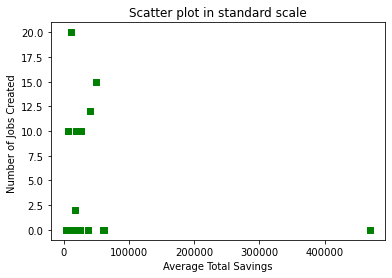

In [168]:
plt.scatter(savings_jobs_data['Total Savings'], savings_jobs_data['Job created'], marker = 's', color = 'green')
plt.xlabel('Average Total Savings')
plt.ylabel('Number of Jobs Created ')
plt.title('Scatter plot in standard scale')
plt.show()

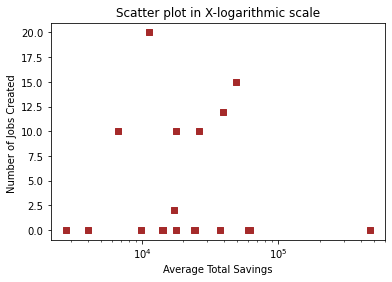

In [167]:
plt.scatter(savings_jobs_data['Total Savings'], savings_jobs_data['Job created'], marker = 's', color = 'brown')
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Average Total Savings')
plt.ylabel('Number of Jobs Created ')
plt.title('Scatter plot in X-logarithmic scale')
plt.show()

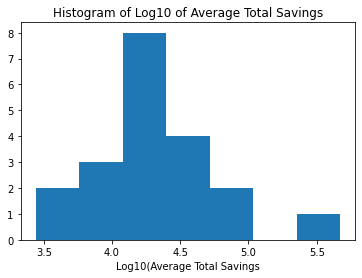

In [163]:
plt.hist(np.log10(savings_jobs_data['Total Savings']), bins = 7)
plt.xlabel('Log10(Average Total Savings')
plt.title('Histogram of Log10 of Average Total Savings')
plt.show()

### Calculate the total jobs created in each month

In [175]:
df['Effective Date'] = pd.to_datetime(df['Effective Date'])

In [197]:
df['Effective Month'] = df['Effective Date'].dt.to_period('M').values.astype('datetime64[M]')

In [198]:
month_job = pd.DataFrame(df.groupby('Effective Month')['Job created'].sum()).reset_index()

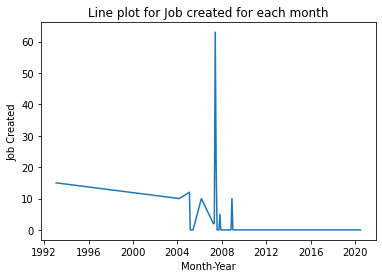

In [202]:
plt.plot(month_job['Effective Month'], month_job['Job created'])
plt.xlabel('Month-Year')
plt.ylabel('Job Created')
plt.title('Line plot for Job created for each month')
plt.show()